<a href="https://colab.research.google.com/github/jarrodsb/DSPS_JBieber/blob/main/HW2/Solutions_Bayesian_posteriors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Jarrod Bieber - PHYS 461 Homework 2**

# Do priors matter??

Inspired by https://twitter.com/rlmcelreath/status/1701165078949581182/photo/1

TASK 1: Use `scipy.stats` to generate four distributions:
- a standard normal with mean 0, variance 1
- a standard normal with mean 10, variance 1
- a student's with 2 degrees of freedom centered on 0
- a student's with 2 degrees of freedom centered on 10

Plot all the distributions.


TASK 2: Create a function that takes two arguments: (1) a prior distribution (as a numpy array), (2) a likelihood distribution (same), calculates the posterior distributions, and plots the prior (with a black dashed line), likelihood (black solid line), and posterior (red line). Normalize each distribution before calculating the prior and plotting so that the peak is at the same height (for optimal visibility).

TASK 3: Pass to the function each combination of prior and likelihood between the four distributions you creted: normal-normal, t-t, normal-t, t-normal.

Your should end up with a plot of the posterior linelihood and prior in the same plot for each of the four posterior distributions (4 plots). EACH PLOT SHOULD BE FOLLOWED BY A CAPTION DESCRIBING THE WHAT THE WHY AND THE "WOW"



In [ ]:
#these are all the imports you need
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
...

Ellipsis

# TASK 1

In [ ]:
# Defining the distributions
Norm_0 = stats.norm(loc=0, scale=1)
Norm_10 = stats.norm(loc=10, scale=1)
tStudent_0 = stats.t(df=2, loc=0, scale=1)
tStudent_10 = stats.t(df=2, loc=10, scale=1)


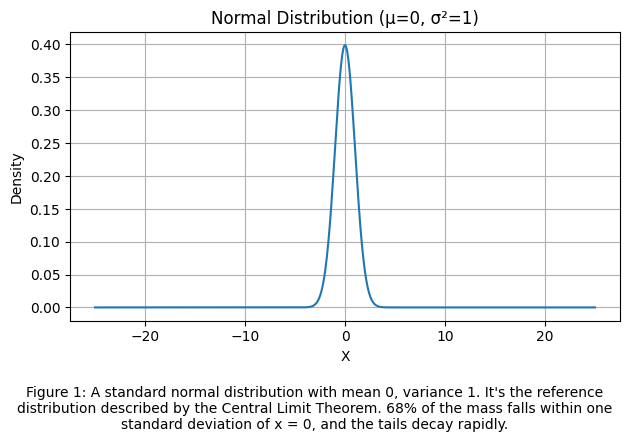

In [ ]:
dist = Norm_0
x = np.linspace(-25,25,1000)
y = dist.pdf(x)
caption = "Figure 1: A standard normal distribution with mean 0, variance 1. It's the reference distribution described by the Central Limit Theorem. 68% of the mass falls within one standard deviation of x = 0, and the tails decay rapidly."

plt.plot(x,y)
plt.title("Normal Distribution (μ=0, σ²=1)")
plt.xlabel("X")
plt.ylabel("Density")
plt.grid()

plt.figtext(0.5, 0.1, caption, ha='center', fontsize=10, wrap=True)
plt.tight_layout(rect=[0, 0.2, 1, 1])

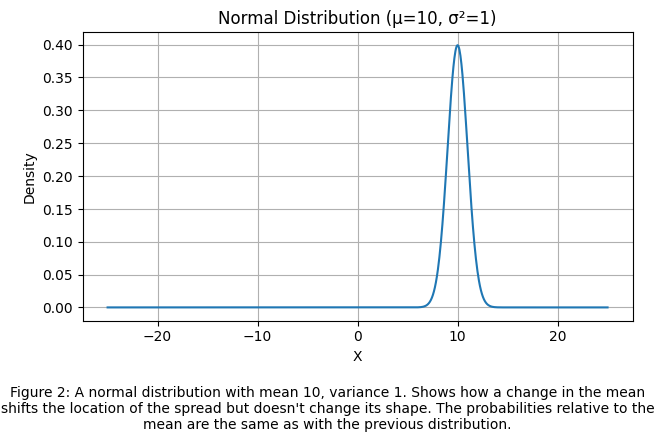

In [ ]:
dist = Norm_10
x = np.linspace(-25,25,1000)
y = dist.pdf(x)
caption = "Figure 2: A normal distribution with mean 10, variance 1. Shows how a change in the mean shifts the location of the spread but doesn't change its shape. The probabilities relative to the mean are the same as with the previous distribution."

plt.plot(x,y)
plt.title("Normal Distribution (μ=10, σ²=1)")
plt.xlabel("X")
plt.ylabel("Density")
plt.grid()

plt.figtext(0.5, 0.1, caption, ha='center', fontsize=10, wrap=True)
plt.tight_layout(rect=[0, 0.2, 1, 1])

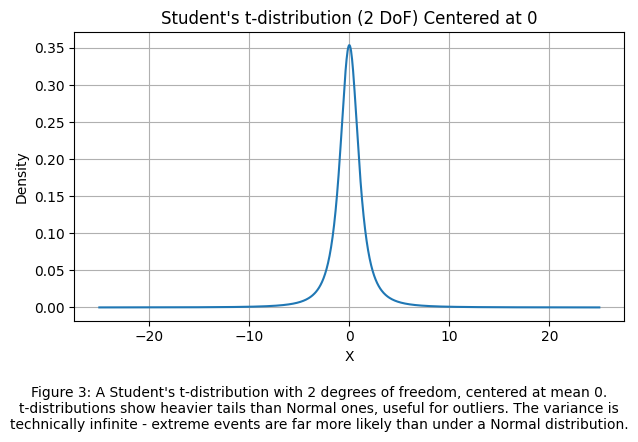

In [ ]:
dist = tStudent_0
x = np.linspace(-25,25,1000)
y = dist.pdf(x)
caption = "Figure 3: A Student's t-distribution with 2 degrees of freedom, centered at mean 0. t-distributions show heavier tails than Normal ones, useful for outliers. The variance is technically infinite - extreme events are far more likely than under a Normal distribution."

plt.plot(x,y)
plt.title("Student's t-distribution (2 DoF) Centered at 0")
plt.xlabel("X")
plt.ylabel("Density")
plt.grid()

plt.figtext(0.5, 0.1, caption, ha='center', fontsize=10, wrap=True)
plt.tight_layout(rect=[0, 0.2, 1, 1])

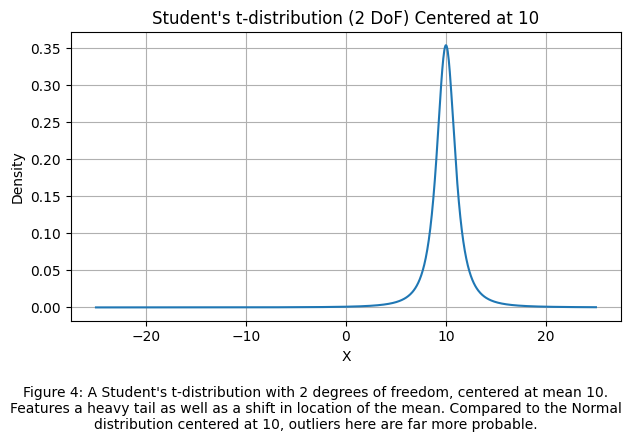

In [ ]:
dist = tStudent_10
x = np.linspace(-25,25,1000)
y = dist.pdf(x)
caption = "Figure 4: A Student's t-distribution with 2 degrees of freedom, centered at mean 10. Features a heavy tail as well as a shift in location of the mean. Compared to the Normal distribution centered at 10, outliers here are far more probable."

plt.plot(x,y)
plt.title("Student's t-distribution (2 DoF) Centered at 10")
plt.xlabel("X")
plt.ylabel("Density")
plt.grid()

plt.figtext(0.5, 0.1, caption, ha='center', fontsize=10, wrap=True)
plt.tight_layout(rect=[0, 0.2, 1, 1])

# TASK 2

In [ ]:
def posterior(prior, likelihood, caption):
  #norm_prior = prior / (prior.max() if prior.max() > 0 else 1.0)
  norm_prior = prior / np.sum(prior)
  #norm_likelihood = likelihood / (likelihood.max() if likelihood.max() > 0 else 1.0)
  norm_likelihood = likelihood / np.sum(likelihood)
  this_posterior = prior * likelihood
  norm_posterior = this_posterior / np.sum(this_posterior)

  x = np.arange(len(prior))

  plt.plot(x, norm_likelihood, '-', color='black', linewidth=2, label='Likelihood')
  plt.plot(x, norm_prior, '--', color='black', linewidth=2, label='Prior')
  plt.plot(x, norm_posterior, '-', color='red', linewidth=2, label='Posterior')
  plt.xlabel('Support (index)')
  plt.ylabel('Relative Probability (pdf)')
  plt.legend()
  plt.grid(True)

  plt.figtext(0.5, 0.1, caption, ha='center', fontsize=10, wrap=True)
  plt.tight_layout(rect=[0, 0.2, 1, 1])

# TASK 3

**Fig 1:**

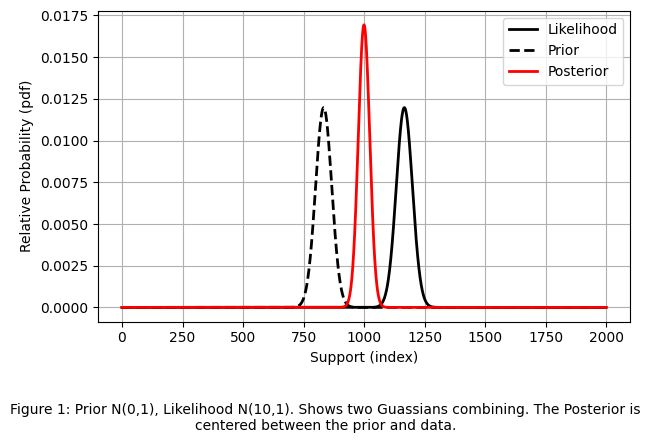

In [ ]:
#function call
x = np.linspace(-25,35, 2000)
caption = "Figure 1: Prior N(0,1), Likelihood N(10,1). Shows two Guassians combining. The Posterior is centered between the prior and data."
posterior(Norm_0.pdf(x), Norm_10.pdf(x), caption)

**Fig 2:**

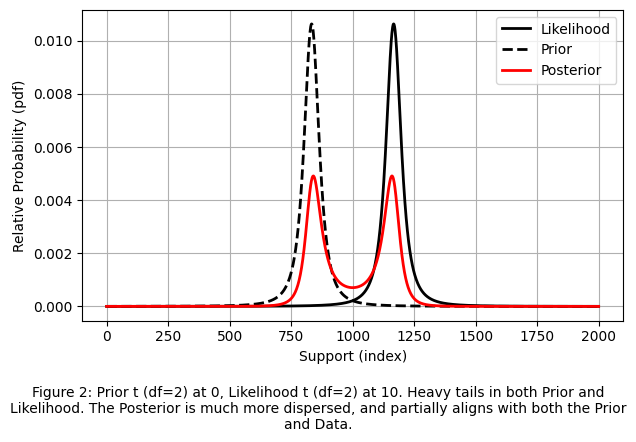

In [ ]:
#function call
x = np.linspace(-25,35, 2000)
caption = "Figure 2: Prior t (df=2) at 0, Likelihood t (df=2) at 10. Heavy tails in both Prior and Likelihood. The Posterior is much more dispersed, and partially aligns with both the Prior and Data."
posterior(tStudent_0.pdf(x), tStudent_10.pdf(x), caption)

**Fig 3:**

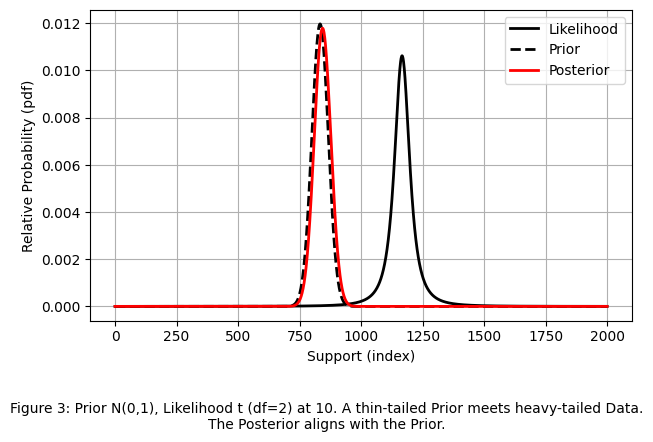

In [ ]:
#function call
x = np.linspace(-25,35, 2000)
caption = "Figure 3: Prior N(0,1), Likelihood t (df=2) at 10. A thin-tailed Prior meets heavy-tailed Data. The Posterior aligns with the Prior."
posterior(Norm_0.pdf(x), tStudent_10.pdf(x), caption)

**Fig 4:**

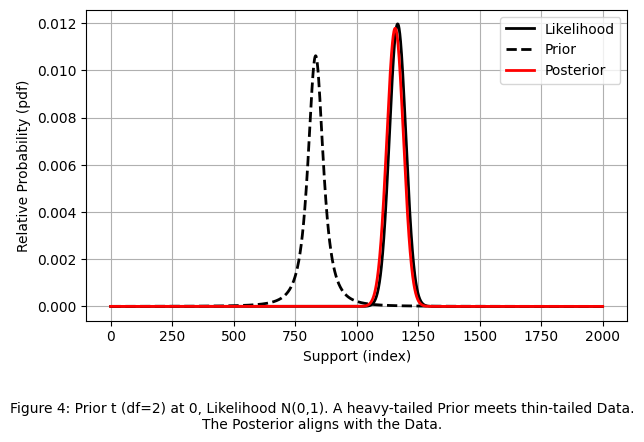

In [ ]:
#function call
x = np.linspace(-25,35, 2000)
caption = "Figure 4: Prior t (df=2) at 0, Likelihood N(0,1). A heavy-tailed Prior meets thin-tailed Data. The Posterior aligns with the Data."
posterior(tStudent_0.pdf(x), Norm_10.pdf(x), caption)